In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("sales.csv")
data.drop(columns = "Unnamed: 0", inplace = True)

In [3]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
data.rename(columns = {"Perrin Freres monthly champagne sales millions ?64-?72" : "Fares"} , inplace = True)
data.head()

,Month,Fares
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
data.drop([105,106], axis=0, inplace=True)

In [6]:
data.tail()

,Month,Fares
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [7]:
data.Month = pd.to_datetime(data.Month)
data.head()

,Month,Fares
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [8]:
data.set_index("Month", inplace = True)
data.head()

,Fares
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<AxesSubplot:xlabel='Month'>

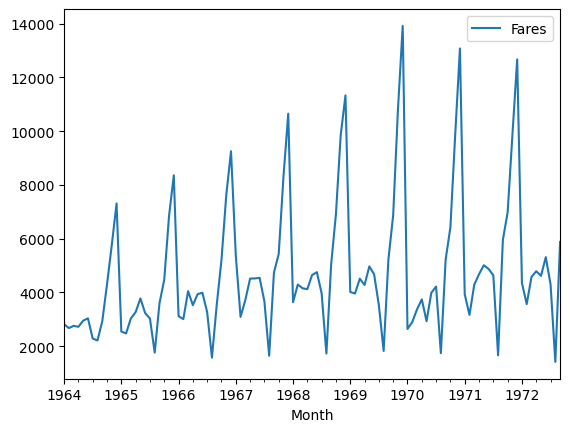

In [9]:
data.plot()

Steps :
1. Stability of data test - Adfuller or Dicky-Fuuller test
2. Lag for achieving statbility (identifies d - differencing for achiving stability)
3. PACF - for p - AutoRegression or AR term - (trend - linear, quadratic) - PACF is used to determine this. No. of lags term to be considered in regression equation ( Yt = a + b(t-1)* Y(t-1) for p =1) 
4. ACF - for q - Moving averages or MA term - (this is for smoothing) - this removes autocorrelation (no. of terms for moving averages)

ARIMA - Auto-regressive(p) Integrated(d) Moving-Averages(q)

ARIMA(1,1,1)

Z(t) = b(t-1)Z(t-1) + e(t-1)E(t-1) + x(t)[error]

Z(t) = Y(t) - Y(t-1) (d=1)

H(t) = Z(t) -Z(t-1) (d=2)


In [10]:
#packages
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#seasonal decompose package
from statsmodels.tsa.seasonal import seasonal_decompose

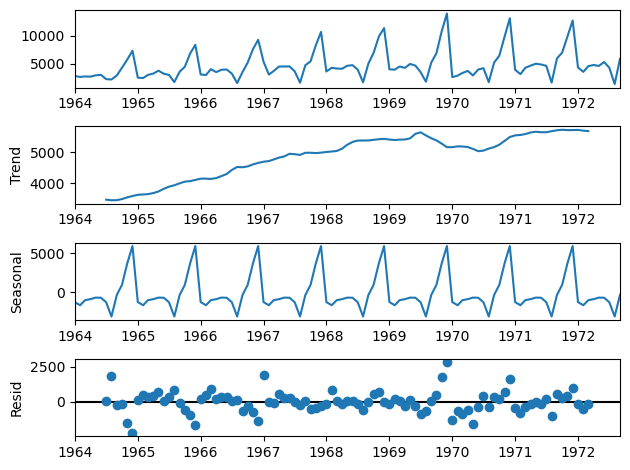

In [11]:
decompose_data = seasonal_decompose(data, model="additive" )
decompose_data.plot()
plt.pyplot.show()

<AxesSubplot:xlabel='Month'>

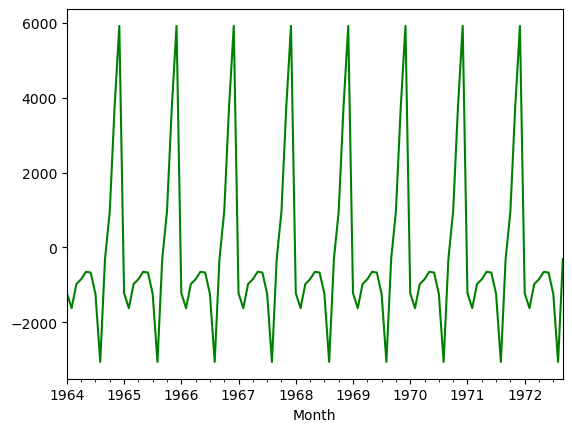

In [12]:
decompose_data.seasonal.plot(color="green")

1. Data doesn't seems to be stationary 
2. For non-stationary data a) we can make it stationary using differencing b) use sarima model

In [13]:
# test for stationary data - Augmented Dickey-Fuller test (Adfuller)

adfuller(data.Fares)

(-1.8335930563276248,
 0.363915771660244,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [14]:

def adfuller_test(Fares):
    result = adfuller(Fares)
    labels = ["adf","p-values","usedlags","No. of Observasation", "critical values","icbest"]
    for label,value in zip(labels,result):
        print(label, ": ", value)
    if result[1]>0.05:
        print("H0 = Data is not Stationary in Adfuller. Hence null Hypothesis is accepted and data is not Stationary")
    else:
        print("Null Hypothesis is rejected and Data is Stationary")
        

In [15]:
adfuller_test(data["Fares"])

adf :  -1.8335930563276248
p-values :  0.363915771660244
usedlags :  11
No. of Observasation :  93
critical values :  {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}
icbest :  1478.4633060594724
H0 = Data is not Stationary in Adfuller. Hence null Hypothesis is accepted and data is not Stationary


In [16]:
# Link : "https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/"
# AR: Y(t) = a + b(t-1)*Y(t-1) (lag =1) + b(t-2)*Y(t-2) (lag=2) + .....

#Differencing

data["First Fares Difference"] = data["Fares"] - data["Fares"].shift(1)
data.head()



,Fares,First Fares Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [17]:
data["Seasonal Difference"] = data["Fares"] - data["Fares"].shift(12)
data.head()

,Fares,First Fares Difference,Seasonal Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [18]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Seasonal Difference'}, xlabel='Month'>

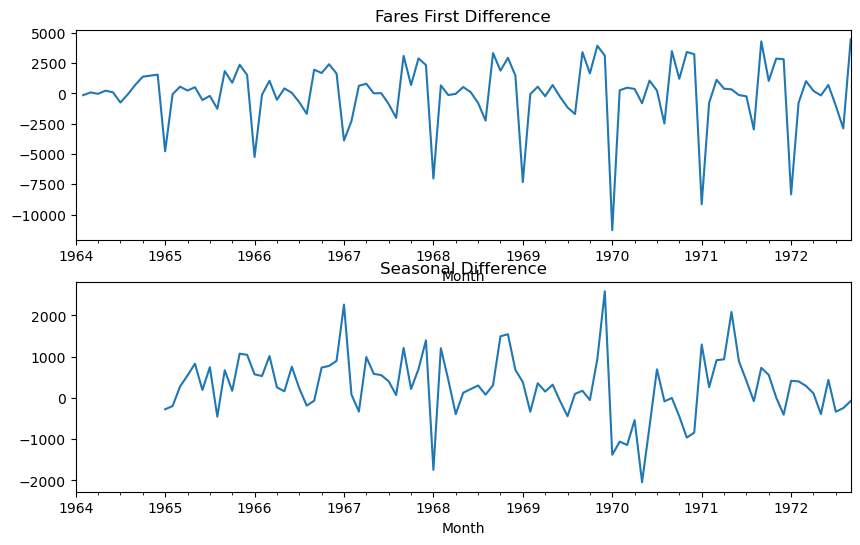

In [19]:
fig = plt.figure(figsize =(10,6))
ax1 = fig.add_subplot(211)
data["First Fares Difference"].plot(title = "Fares First Difference", ax=ax1)
ax2 = fig.add_subplot(212)
data["Seasonal Difference"].plot(title = "Seasonal Difference", ax=ax2)

In [20]:
adfuller_test(data["First Fares Difference"].dropna())

adf :  -7.189896448051015
p-values :  2.5196204473868427e-10
usedlags :  11
No. of Observasation :  92
critical values :  {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}
icbest :  1466.8267262915892
Null Hypothesis is rejected and Data is Stationary


In [21]:
adfuller_test(data["Seasonal Difference"].dropna())

adf :  -7.626619157213163
p-values :  2.060579696813685e-11
usedlags :  0
No. of Observasation :  92
critical values :  {'1%': -3.503514579651927, '5%': -2.893507960466837, '10%': -2.583823615311909}
icbest :  1294.7753384560438
Null Hypothesis is rejected and Data is Stationary


C:\Users\kunda\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


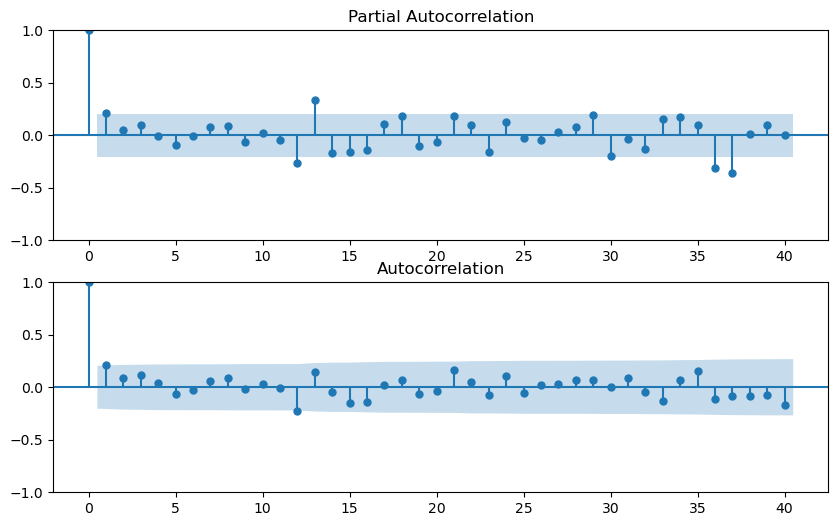

In [22]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(211)
fig = plot_pacf(data["Seasonal Difference"].iloc[13:], lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_acf(data["Seasonal Difference"].iloc[13:], lags = 40, ax = ax2)

# ARIMA

In [23]:
model_01 = sm.tsa.arima.ARIMA(data["Fares"], order = (1,1,1))
model_01.fit().summary()

C:\Users\kunda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Fares   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Wed, 26 Oct 2022   AIC                           1911.627
Time:                        00:31:41   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.998      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.305      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

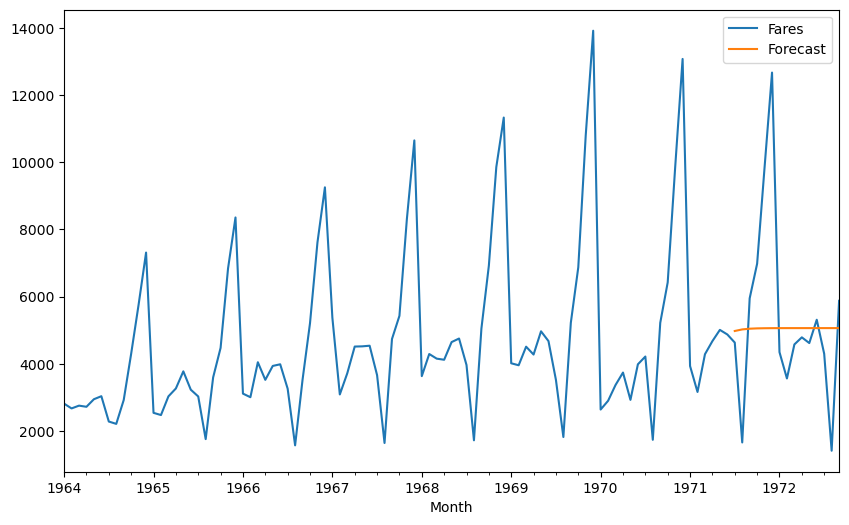

In [24]:
data["Forecast"] = model_01.fit().predict(start=90, end=104, dynamic = True)
data[["Fares","Forecast"]].plot(figsize = (10,6))

# SARIMA

In [25]:
model_02 = sm.tsa.arima.ARIMA(data["Fares"], order = (1,1,1),seasonal_order=(1, 1, 1, 12))
model_02.fit().summary()

C:\Users\kunda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kunda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                            Fares   No. Observations:                  105
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                          Wed, 26 Oct 2022   AIC                           1486.804
Time:                                  00:31:42   BIC                           1499.413
Sample:                              01-01-1964   HQIC                          1491.893
                                   - 09-01-1972                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

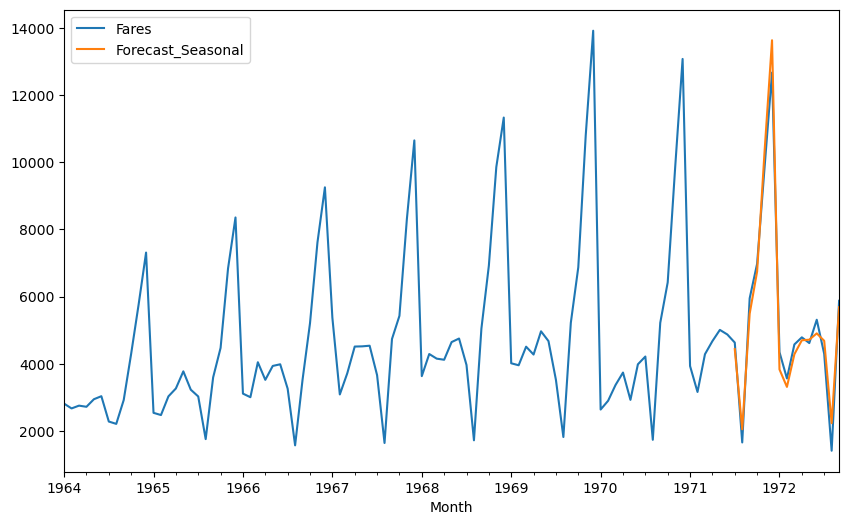

In [26]:
data["Forecast_Seasonal"] = model_02.fit().predict(start=90, end=104, dynamic = True)
data[["Fares","Forecast_Seasonal"]].plot(figsize = (10,6))

# Future Prediction

In [27]:
from pandas.tseries.offsets import DateOffset
future_dates = [data.index[-1] + DateOffset(months=x) for x in range(0,24)]
#future_dates

In [28]:
new_df = pd.DataFrame(index= future_dates, columns = data.columns)
new_df.head()

,Fares,First Fares Difference,Seasonal Difference,Forecast,Forecast_Seasonal
1972-09-01,NaN,NaN,NaN,NaN,NaN
1972-10-01,NaN,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN


In [29]:
future_df = pd.concat([data, new_df])

<AxesSubplot:>

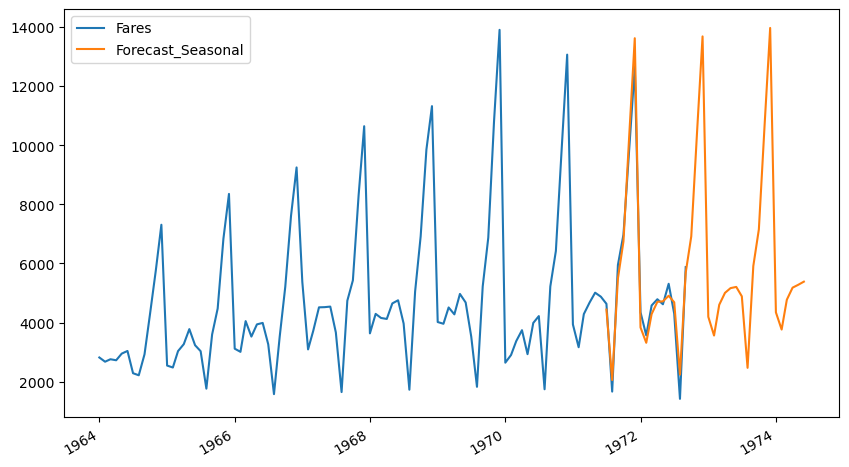

In [30]:
future_df["Forecast_Seasonal"] = model_02.fit().predict(start=90, end=125, dynamic = True)
future_df[["Fares","Forecast_Seasonal"]].plot(figsize = (10,6))

In [31]:
#data.to_csv("sales")